In [1]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
## This opens a *.pkl file

def unpickle(filename):
    with open(filename, "rb") as f:
        data = pickle.load(f)
    return data

# this saves "thing" to a *.pkl file
def to_pickle(thing, filename):
    with open(filename, "wb") as f:
        pickle.dump(thing, f)
        f.close()

In [3]:
train = unpickle("train.pkl")
print(train["data"].shape)
print(train["label"].shape)
print(type(train))

(10000, 12288)
(10000,)
<class 'dict'>


In [4]:
test = unpickle("test.pkl")
print("DONE")
print(test['data'].shape)

DONE
(2000, 12288)


In [5]:
# label dictionary: this maps label integer to the name of the animal
label2name = {1: 'dog',
              2: 'rabbit',
              3: 'deer',
              4: 'elephant',
              5: 'horse',
              6: 'squirrel',
              7: 'tiger',
              8: 'wolf',
              9: 'chimpanzee',
              10: 'panda'}

In [6]:
# this plot one image given the image index
def show_image(idx, train, label2name=label2name):
    img = train["data"][idx]
    img = np.dstack((img[:4096], img[4096:8192], img[8192:])).reshape(64,64,3)
    plt.imshow(img)
    plt.title(label2name[train["label"][idx]])
    plt.show()

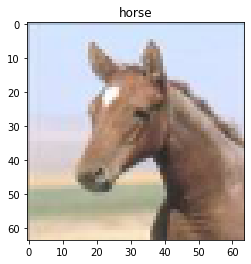

5


In [7]:
show_image(2, train)
print(train["label"][2])

In [8]:
### YOUR CODE HERE ###
#Decision of 
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
# Your code
j = OneHotEncoder()
y_enc= train['label']
y_enc = y_enc.reshape(-1, 1)
#print(y_enc)
j.fit(y_enc)
y_enc_2 = j.transform(y_enc).toarray()
y_enc = y_enc_2
#print(y_enc)



def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_losses_no_val(hist):
    plt.plot(hist.history['loss'])
    #plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'])
    plt.show()
def plot_accuracies_no_val(hist):
    plt.plot(hist.history['accuracy'])
    #plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train'])
    plt.show()
print(train['label'][2])
print(y_enc[2])

5
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
#Reshape images
reshaped = train['data']
reshaped = reshaped.reshape(reshaped.shape[0], 64, 64, 3)
print(reshaped.shape)
print(np.max(reshaped))
print(y_enc.shape)

(10000, 64, 64, 3)
255
(10000, 10)


In [10]:
# Some stuff we'll need...
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from keras.applications.resnet import ResNet50
from keras.layers import GlobalMaxPooling2D,GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.layers.core import Dense, Dropout, Flatten


In [11]:
# Import the ResNet50 trained neural network model, minus it's last (top) neuron layer.
base_model = ResNet50(weights = 'imagenet', 
                   include_top = False, 
                   input_shape = (64, 64, 3), 
                   pooling = None)
x = base_model.output
print(type(x))
# This freezes the weights of the pretrained model.
for layer in base_model.layers:  
    layer.trainable = True
### YOUR CODE HERE ###
from keras.layers import Conv1D

#x = base_model.output
#print(type(x))
x = GlobalAveragePooling2D()(x)
#print(type(x))
#x = Dense(10, 'relu')(x)
#out = Dense(10,activation='softmax')(x)
#model_final = Model(base_model.input,out)
#model_final.summary()

                           
x = Dropout(.5)(x)
x = Dense(units = 1024,  activation = 'relu')(x)                 
x = BatchNormalization()(x) 
print(x.get_shape())
#model.add(Conv1D(32, 1, input_shape=128)) # 32 different 3x3 kernels -- so 32 feature maps

#input_shape_conv = (4, 10, 128)
x = Dropout(.5)(x)
x = Dense(units = 1024, activation = 'relu')(x)
x = BatchNormalization()(x) 

#x = tf.keras.layers.Conv1D(3, 3, activation='relu', input_shape = input_shape_conv)(x)
x = Dense(units = 1024, activation = 'linear')(x)
out = Dense(10,activation='softmax')(x)
model_final = Model(base_model.input,out)
model_final.summary()

                           
           
#x = Dense(units = 1024,  activation = 'relu')(x)                 
#x = BatchNormalization()(x) 
print(x.get_shape())
#model.add(Conv1D(32, 1, input_shape=128)) # 32 different 3x3 kernels -- so 32 feature maps

#input_shape_conv = (4, 10, 128)
#x = Dense(units = 1024, activation = 'relu')(x)
#x = BatchNormalization()(x) 

#x = tf.keras.layers.Conv1D(3, 3, activation='relu', input_shape = input_shape_conv)(x)
#x = Dense(units = 1024, activation = 'linear')(x)
#out = Dense(10,activation='softmax')(x)
#model_final = Model(base_model.input,out)
#model_final.summary()
print("DONE")
model_final.summary()

<class 'keras.engine.keras_tensor.KerasTensor'>
(None, 1024)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 27,803,530
Trainable params: 27,746,314
Non-trainable params: 57,216
__________________________________________________________________________________________________
(None, 1024)
DONE
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 27,803,530
Trainable params: 27,746,314
Non-trainable params: 57,216
__________________________________________________________________________________________________


In [ ]:
### YOUR CODE HERE ##
model_final.summary()
model_final.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])

hist = model_final.fit(reshaped, y_enc,
                    epochs = 60, 
                   batch_size = 256,
                    validation_split = 0.2,
                    verbose = 1)


print("done")

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 27,803,530
Trainable params: 27,746,314
Non-trainable params: 57,216
__________________________________________________________________________________________________
Epoch 1/60
 4/32 [==>...........................] - ETA: 8:00 - loss: 8.0206 - accuracy: 0.0859

In [ ]:
plot_losses(hist)
plot_accuracies(hist)

In [ ]:
test_reshape = test['data']
test_reshape = test_reshape.reshape(test_reshape.shape[0], 64, 64, 3)

pred = model_final.predict(test_reshape) 


In [ ]:
print(np.argmax(pred, axis = 1)[:10] )
print(train['label'][:10])

real_pred = np.argmax(pred, axis=1)
print(type(real_pred))
df = pd.DataFrame(real_pred)
print(df.to_csv('kaggle_predictions.csv'))

In [ ]:
for x in range(len(real_pred)):
    real_pred[x] += 1
    

In [ ]:
print(train['label'][:10])

print(type(real_pred))
df = pd.DataFrame(real_pred)
print(df.to_csv('kaggle_predictions.csv'))